# House Pricing with KNN

Let’s start with importing Boston Housing prices from sklearn - it’s preinstalled and can be accessed via:

from sklearn.datasets import load_boston
boston = load_boston()

Our goal in this task will be to use KNN to predict housing prices. KNN can be used both for regression (prediction of prices) and classification (to which group an object belongs).

Implement:
- Load Boston Dataset and split it into train data and test data (70%, 30%).
- Train and plot KNN for at least 3 different K.

Now let’s get to more complicated dataset:

https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

Our task will be the same:
- Load data, it’s already split into train and test.
- Test KNN for various K. Benchmark your result and choose K which gives the best results.
- use XGBOOST


Importing libraries

In [69]:
# Pandas - Data manipulation and analysis library
import pandas as pd
# NumPy - mathematical functions on multi-dimensional arrays and matrices
import numpy as np
# Matplotlib - plotting library to create graphs and charts
import matplotlib.pyplot as plt

# Math - Python module provides access to the mathematical functions
import math

# Scikit-learn algorithms, functions and data
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score

# XGBoost algorithm library
import xgboost

# Display Matplotlib output inline
%matplotlib inline

# Additional configuration
plt.rcParams["figure.figsize"] = [10, 6]

## Loading data and training the model

Loading the boston house-prices dataset.

In [70]:
X, y = load_boston(return_X_y=True)

Preparing training and testing data by using train_test_split function. 70% for training and 30% for testing.

In [72]:
X = pd.DataFrame(X)

pca = PCA(n_components = 1)

X_reduced = pca.fit_transform(X)

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.3, random_state=0)

In [75]:
X_train = pd.DataFrame(X_train, columns = ['PCA'])
X_test = pd.DataFrame(X_test, columns = ['PCA'])

y_train = pd.DataFrame(y_train, columns = ['Price'])
y_test = pd.DataFrame(y_test, columns = ['Price'])

## Scatter plot of the training data

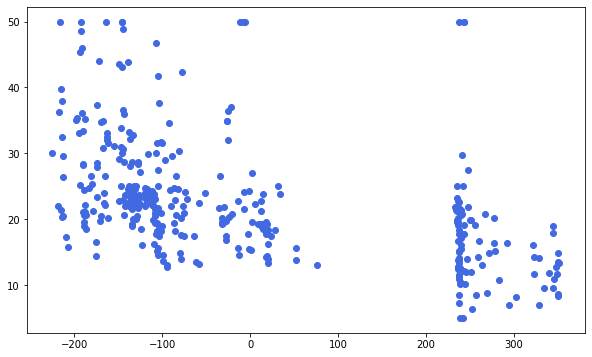

In [77]:
plt.scatter(X_train, y_train, c='royalblue')
plt.show()

## Creating and training the model

In [79]:
n_neighbors = 19
weights = 'uniform'
# model = KNeighborsRegressor(n_neighbors=n_neighbors, weights=weights)

model = xgboost.XGBRegressor(colsample_bytree=0.4,
                 gamma=0,                 
                 learning_rate=0.07,
                 max_depth=3,
                 min_child_weight=1.5,
                 n_estimators=70,                                                                    
                 reg_alpha=0.75,
                 reg_lambda=0.45,
                 subsample=0.6,
                 seed=42) 

model.fit(X_train.values.reshape(-1, 1), y_train)

XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.4, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.07, max_delta_step=0, max_depth=3,
             min_child_weight=1.5, missing=nan, monotone_constraints=None,
             n_estimators=70, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=42, reg_alpha=0.75,
             reg_lambda=0.45, scale_pos_weight=1, seed=42, subsample=0.6,
             tree_method=None, validate_parameters=False, verbosity=None)

## Visualising predictions

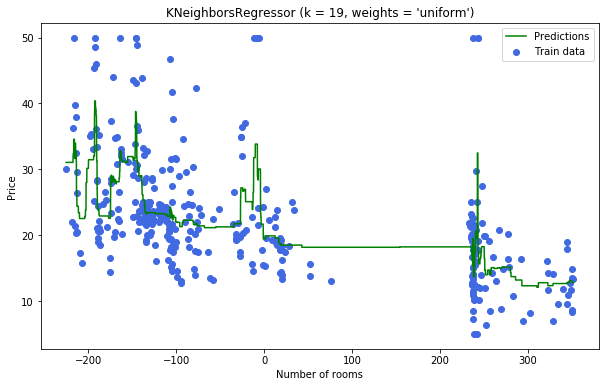

In [94]:
plot_range = np.arange(min(X_train.values), max(X_train.values), 0.01)

pred = model.predict(plot_range.reshape(-1, 1))

new_X, new_y = zip(*sorted(zip(plot_range.reshape(-1, 1), pred))) 
plt.scatter(X_train.values.reshape(-1, 1), y_train, c='royalblue', label='Train data')
plt.plot(new_X, new_y, c='g', label='Predictions')    
plt.legend()
plt.title("KNeighborsRegressor (k = %i, weights = '%s')" % (n_neighbors, weights))
plt.ylabel('Price')
plt.xlabel('Number of rooms')
    
plt.show()

## Testing the model

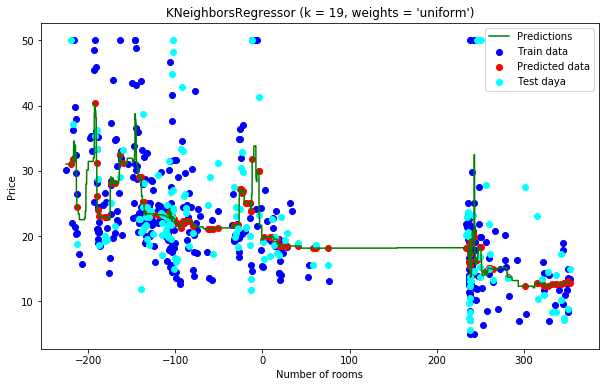

In [96]:
pred = model.predict(X_test.values.reshape(-1, 1))

plt.scatter(X_train.values.reshape(-1, 1), y_train, c='blue', label='Train data')
plt.plot(new_X, new_y, c='g', label='Predictions')
plt.scatter(X_test, pred, c='red', label='Predicted data')
plt.scatter(X_test, y_test, c='cyan', label='Test daya')
plt.legend()
plt.title("KNeighborsRegressor (k = %i, weights = '%s')" % (n_neighbors, weights))
plt.ylabel('Price')
plt.xlabel('Number of rooms')
    
plt.show()

## Model score

In [97]:
score = model.score(X_test.values.reshape(-1, 1), y_test)
score = round(score*100, 2)
print('The mode score is ' + str(score) + '%')


The mode score is 27.17%


In [68]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y
